# Car Insurance Risk Project 🚘

The idea of this project is to predict the insurance risk rating of a car as well as characterizing the 
different segments of the population.  

### 1. EDA
To begin with the project, we'll perform data cleaning and exploratory data analysis (EDA) on the provided dataset. This will include checking for data quality issues, visualizing the data, and extracting insights from it.

### 1.1 Data Quality

In this section, the focus will be on assessing the integrity of the data, ensuring that it is clean and consistent for analysis. 
Steps will include:

- Identifying Missing Data: We will search for any missing or incomplete data points and handle them appropriately (e.g., replacing them with median values or removing affected rows).
- Checking for Duplicates: Any duplicated rows will be identified and removed to prevent bias in the analysis.
- Data Type Correction: Ensuring that each column has the appropriate data type, converting strings to numbers where necessary.
- Outliers: We will identify and handle outliers that could skew the analysis using visualization techniques such as box plots.

1.1.1 Importing Libraries and Loading the Data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

1.1.2 Data Collection and information

In [20]:
def import_data(file_path, columns):
    """
    Function with the responsibility to import the data from the file.
    """
    try:
        data = pd.read_csv(file_path, names=columns)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Constants
file_path = '../data/imports-85.csv'
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Import the data
df = import_data(file_path, columns)

# Showing or Checking results
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
def dfInformation(dataframe):
    """
    Gets the initial information of the Dataset, the number of records, number of variables, non-null objects and data type.

    Args:
        dataframe (DataFrame): Source dataset.
    
    Returns:
        void: A range indes conforma by float64(2), int64(1), object(6)

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe.info()
dfInformation(df)
# Getting the shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

(205, 26)

In [22]:
# Getting all the unique values in the make column
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
# Getting duplicate rows
duplicated = df[df.duplicated()]
print(f"There are {len(duplicated)} duplicated values in dataframe")

There are 0 duplicated values in dataframe


1.1.3 Identifying Missing Data

In [24]:
def check(dataframe):
    """
    Gets the amount of null data and unique is calculated

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe tha represents de amortized values of null and unique values for each column.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check 
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,object,52,0
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,3,0
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


In [25]:
def checkDuplicates(dataframe):
    """
    Checks duplicated values for each column and amortized this count.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        int: The total of duplicated values in an specifica dataframe

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    return dataframe.duplicated().sum()
checkDuplicates(df)

np.int64(0)

All looks like there are no missing values in the dataset. However, we can see that some columns have special characters that need to be removed.

In [26]:
def removeSymbols(dataframe):
    """
    Removes the symbols from the dataset.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe without the symbols.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe = dataframe.replace('?', np.nan)
    return dataframe

# Removing the symbols
df = removeSymbols(df)

In [27]:
# Categorical columns
categorical_columns = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                        'engine-type', 'num-of-cylinders', 'fuel-system']

# Numerical columns
numerical_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                        'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# All numerical columns pass to float or int
df[numerical_columns] = df[numerical_columns].astype(float)

In [28]:
# Rechecking the data
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


### 2. Data Visualization
Visualizations will help uncover relationships between car characteristics and insurance risk. The focus here includes:

- Distribution of Features: Visualizing the distribution of important car attributes (e.g., engine size, body style) using histograms and bar charts to understand their spread across the dataset.
- Correlations: Create a heatmap to identify how different features (e.g., engine size, fuel type, and price) are correlated with each other and with the insurance risk rating.
- Feature-Target Visualization: Use box plots and scatter plots to visually analyze how each feature relates to the car's risk rating, helping to identify patterns.

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

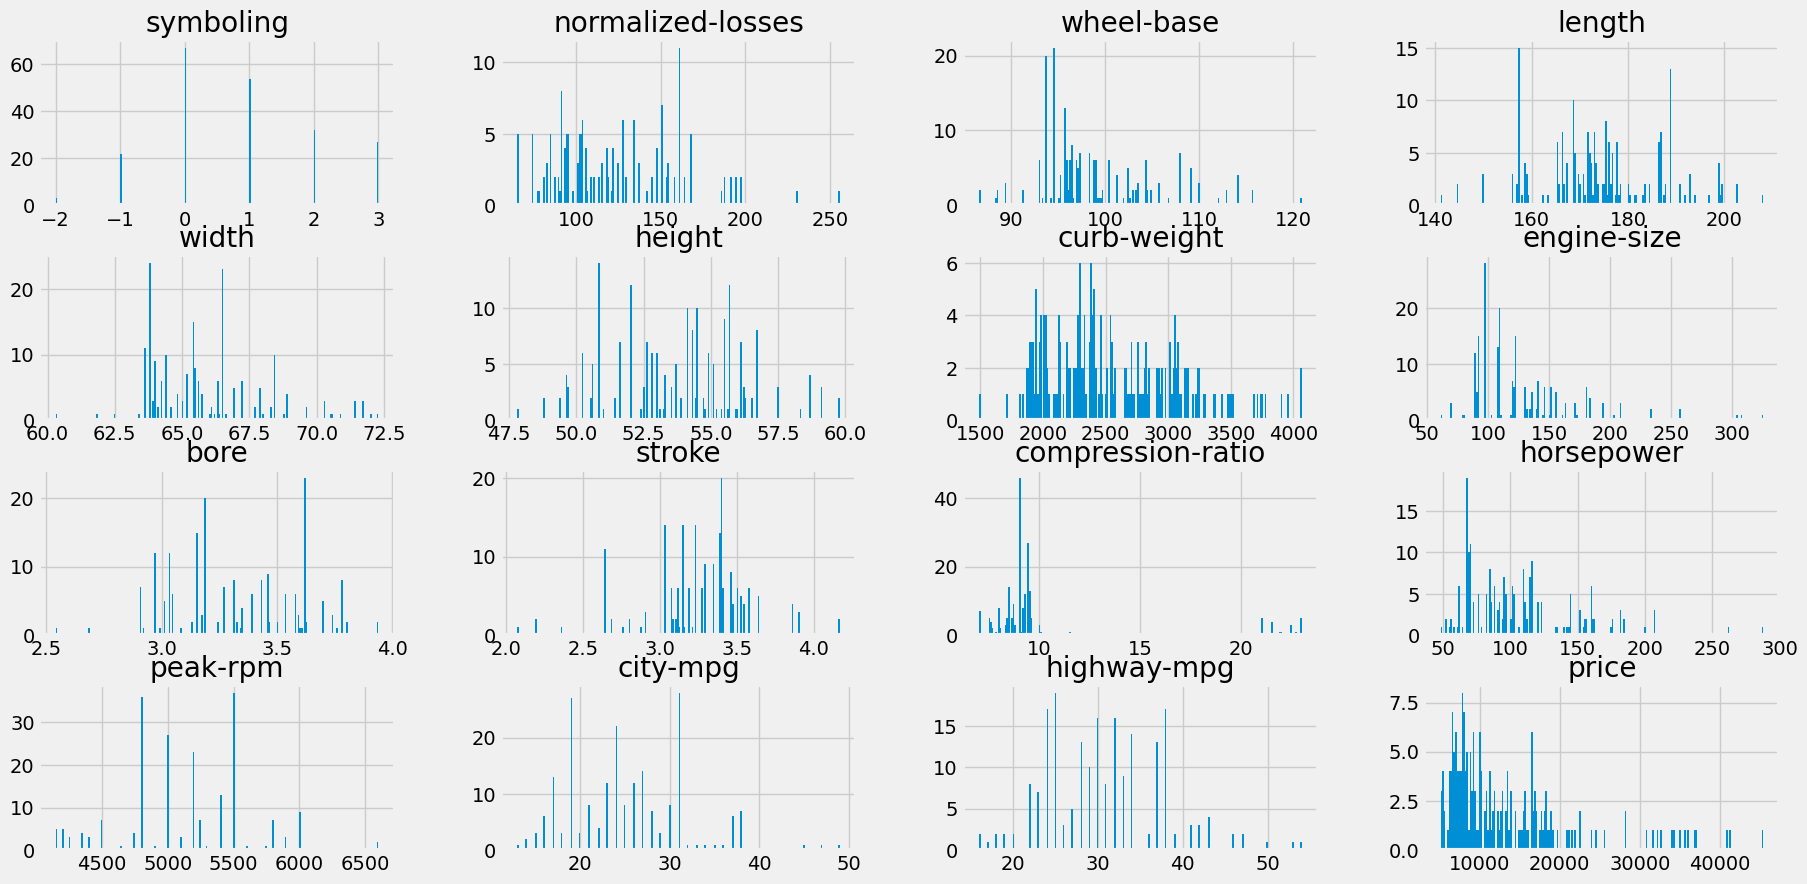

In [29]:
# Dataframe histogram
df.hist(bins=200,figsize=[20,10])

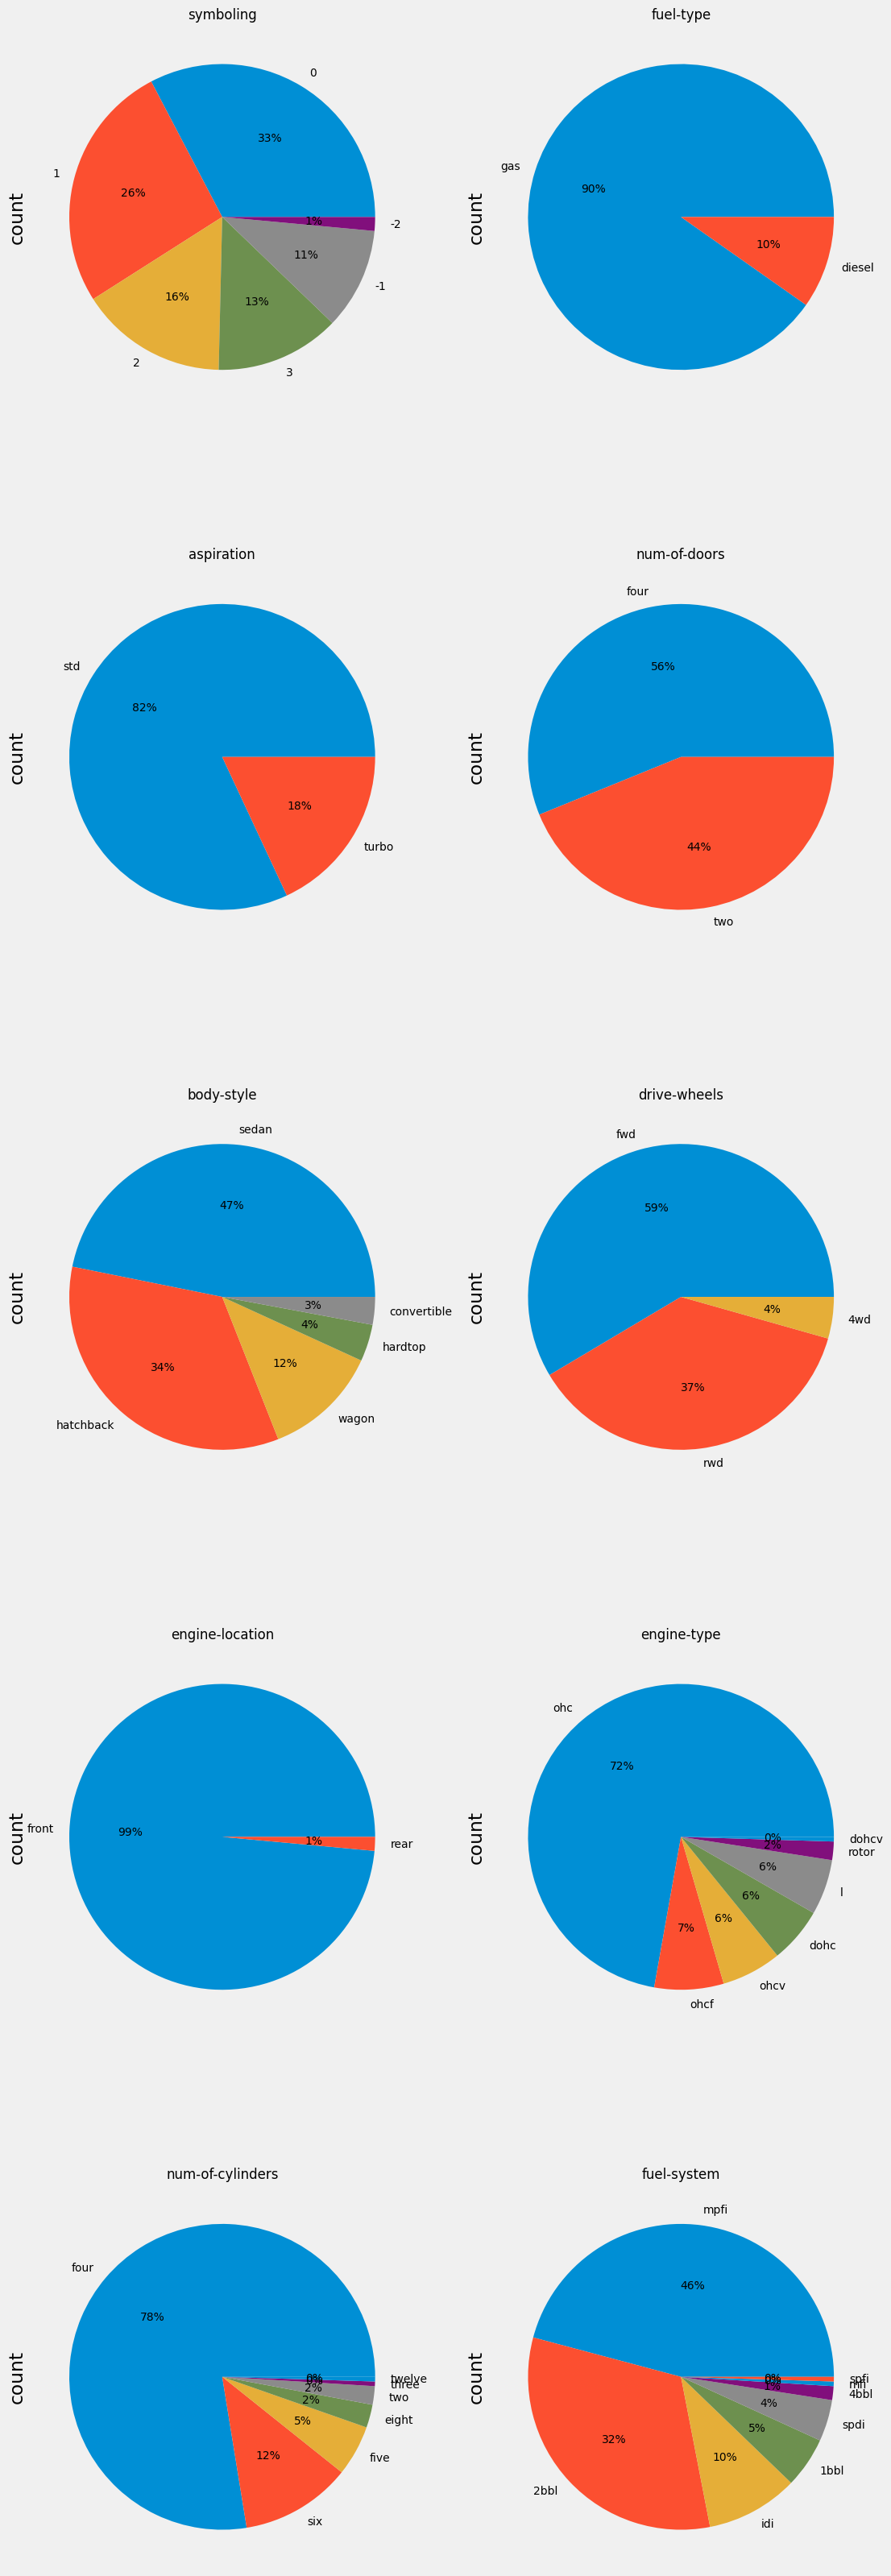

In [30]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(12, 40), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

# Columns list
cols_list = ['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
# Pie plot
pie_plot(df, cols_list, 5, 2)

Text(0, 0.5, 'Count of Cars')

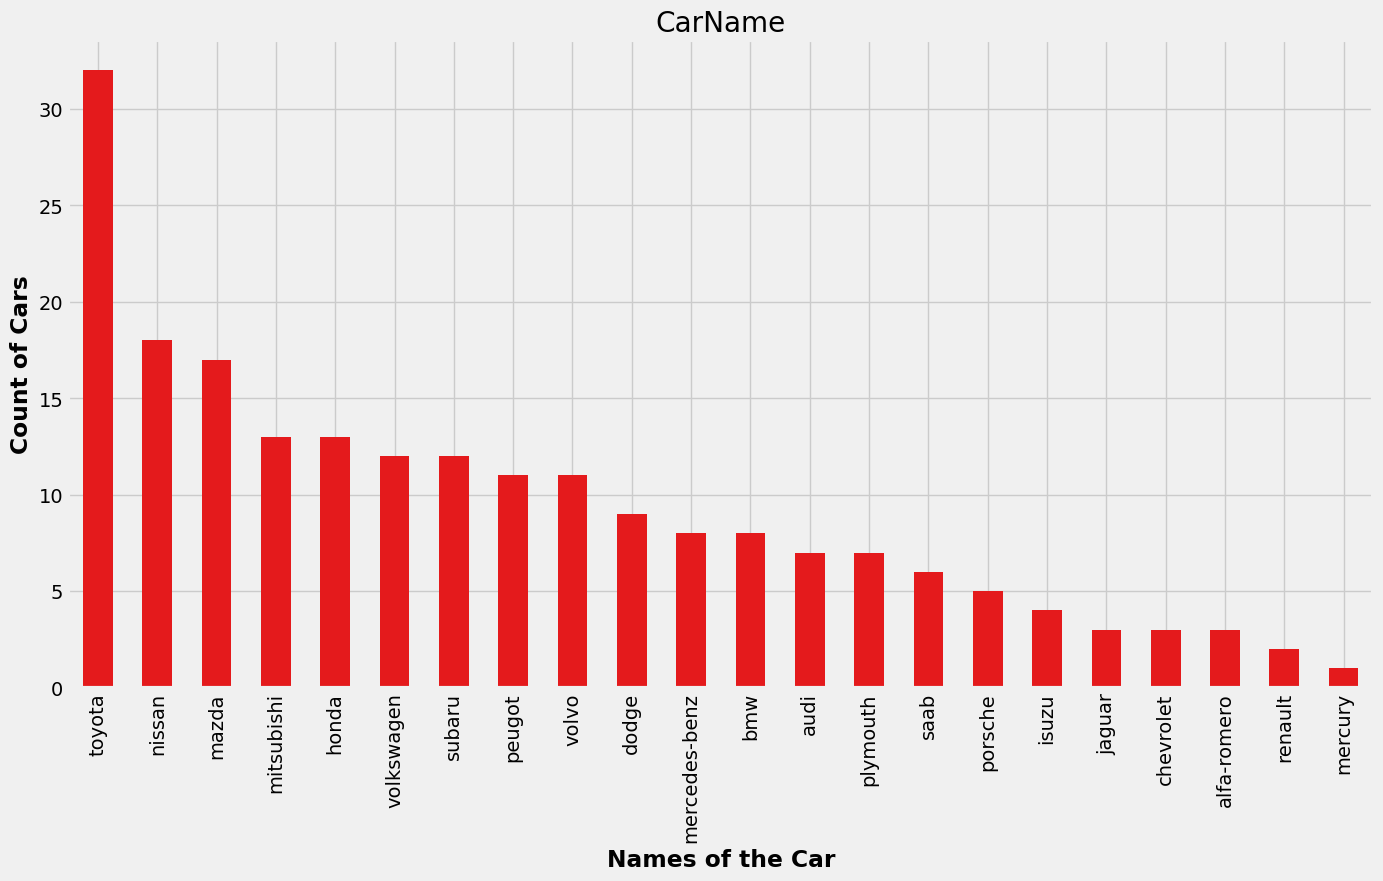

In [31]:
# Visualizing the different makes available

plt.rcParams['figure.figsize'] = [15,8]
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

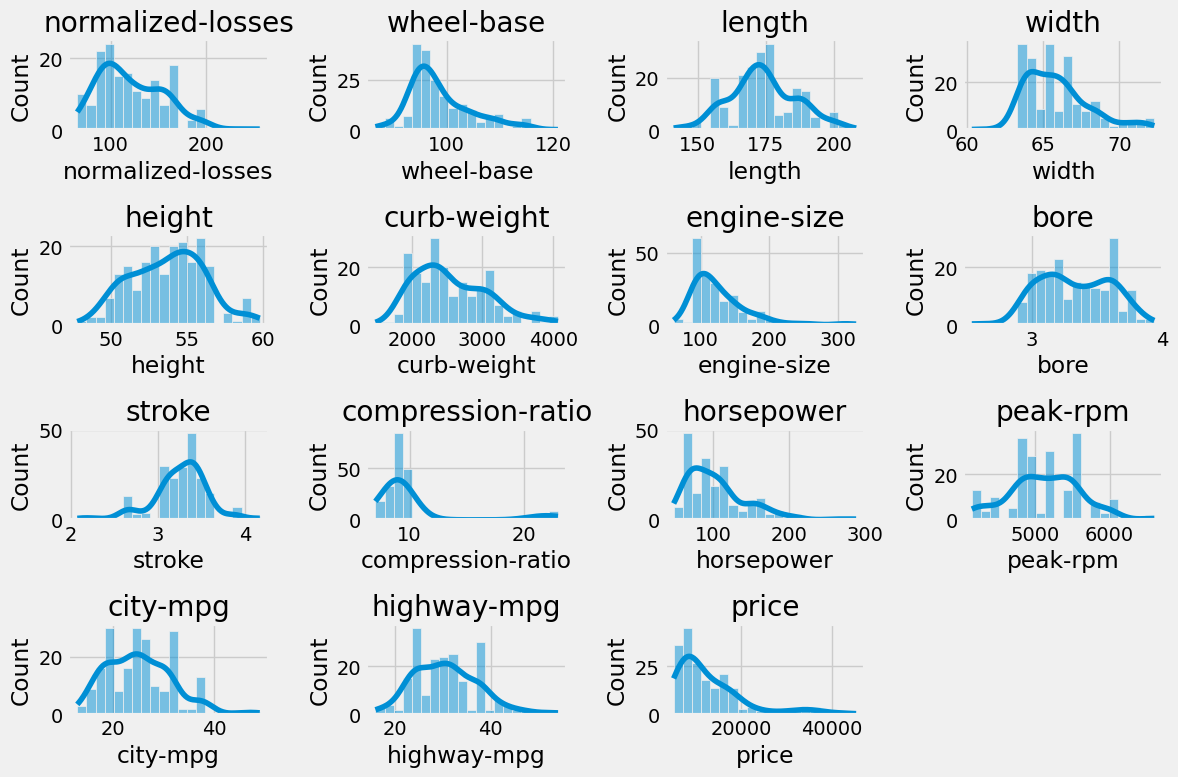

In [32]:
# Visualizing the numerical columns
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(4, 4, numerical_columns.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

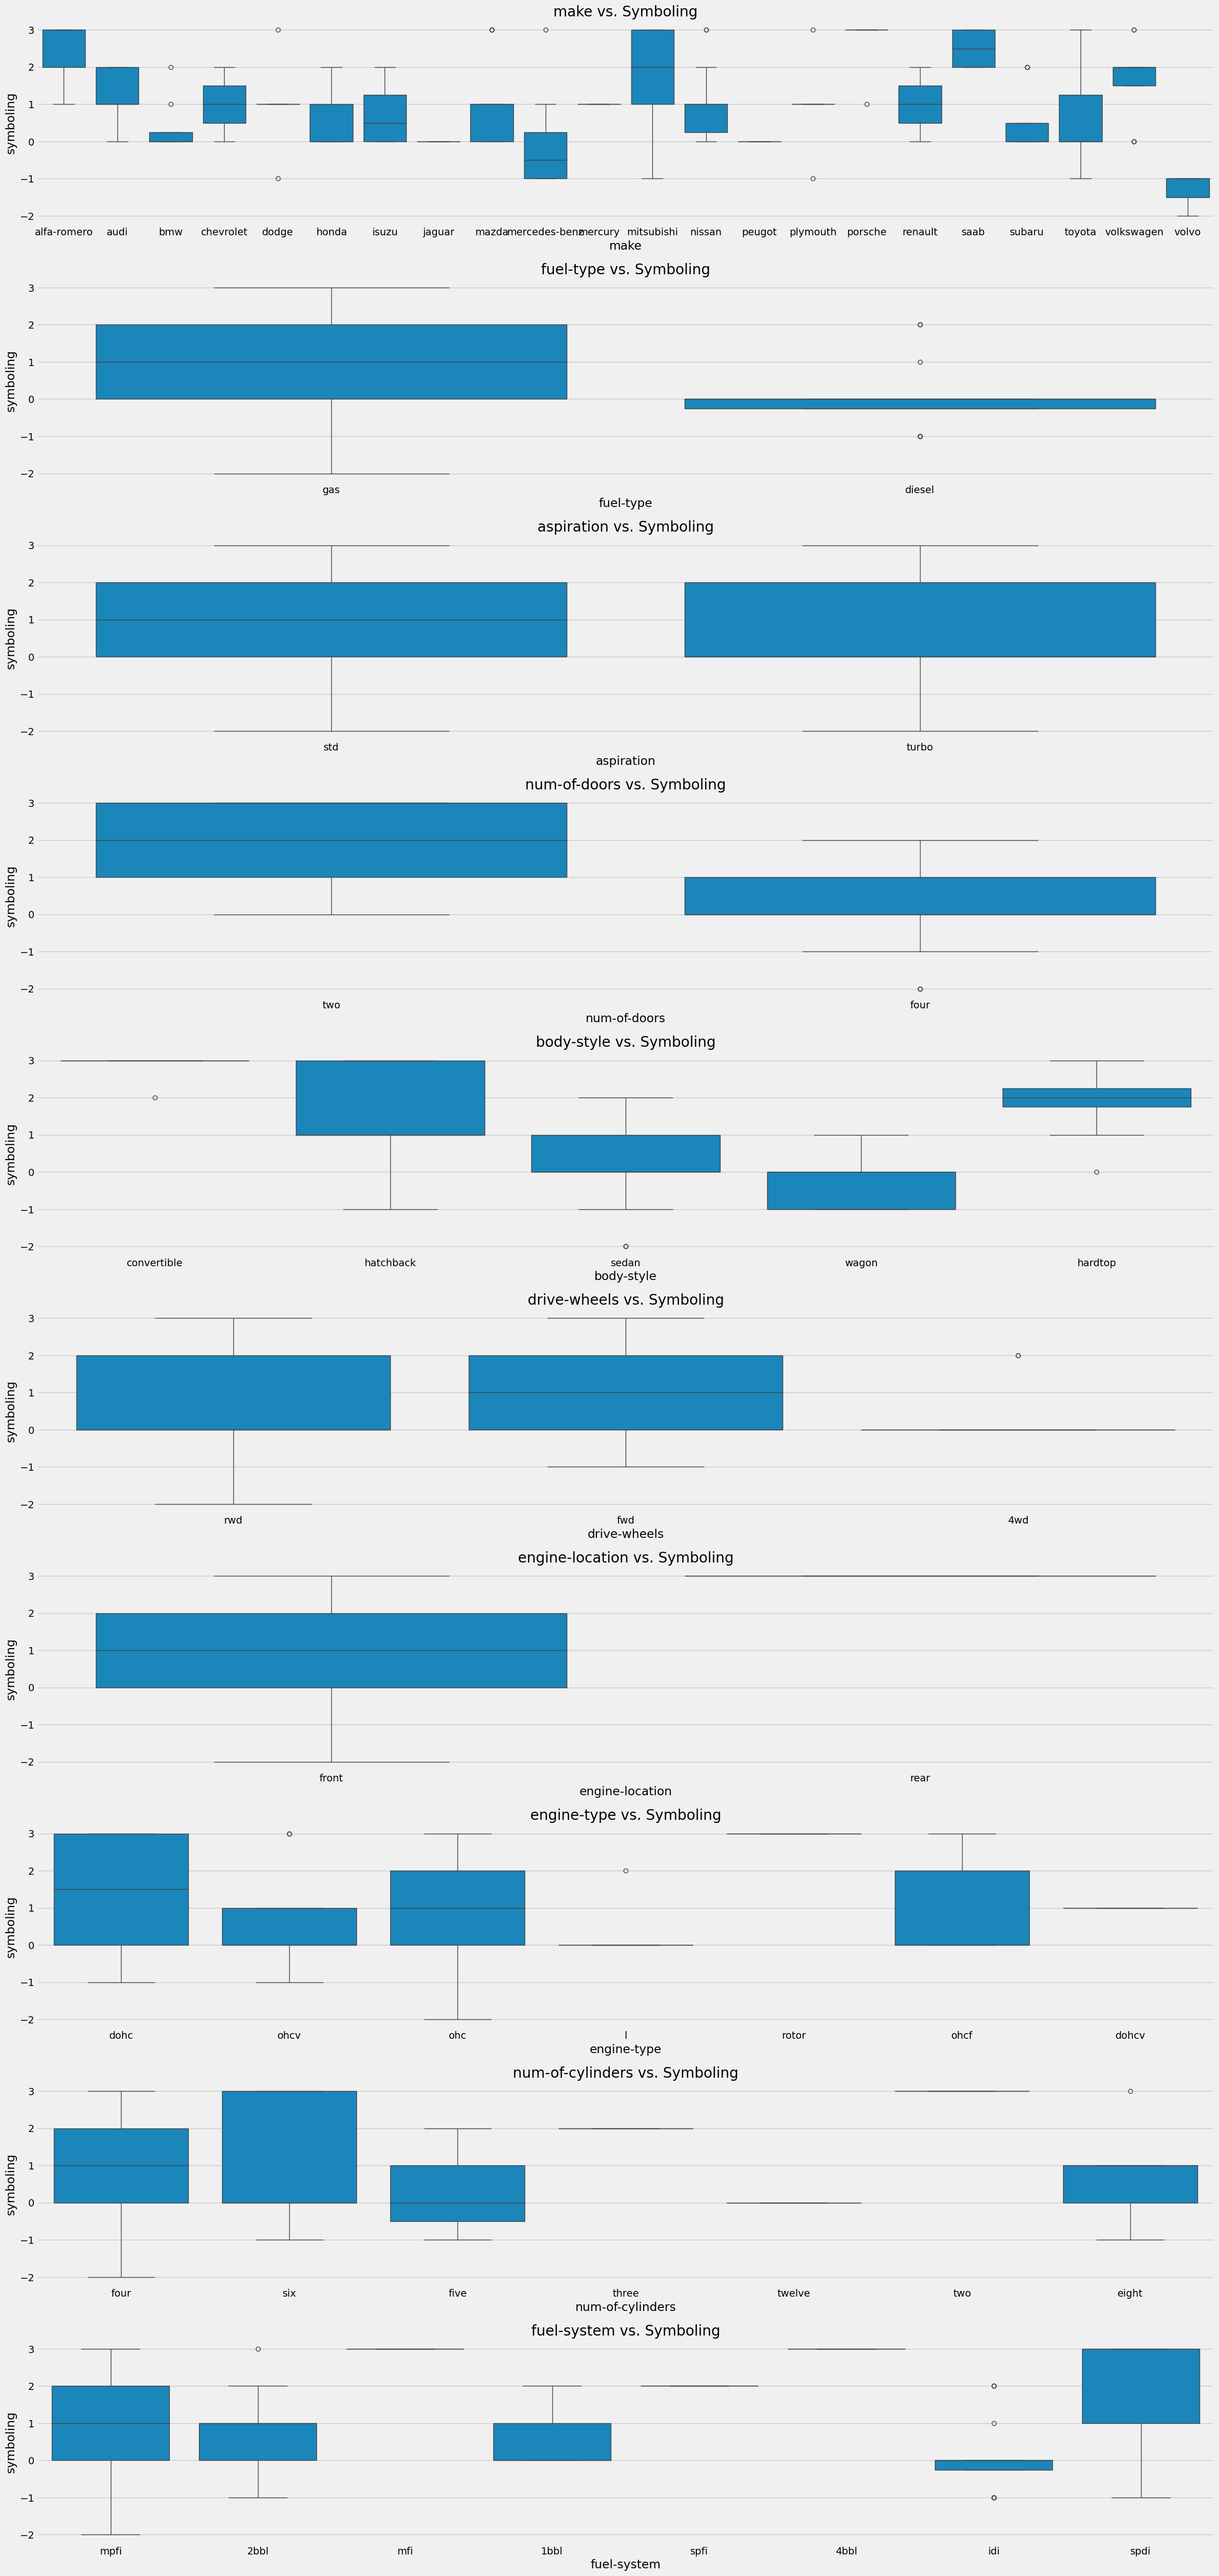

In [33]:
# Categorical Feature vs. symboling
plt.figure(figsize=(24, 60))
slice = categorical_columns[1:]
for feature in slice:
    plt.subplot(12, 1, slice.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='symboling')
    plt.title(f'{feature} vs. Symboling')
plt.tight_layout()
plt.show()

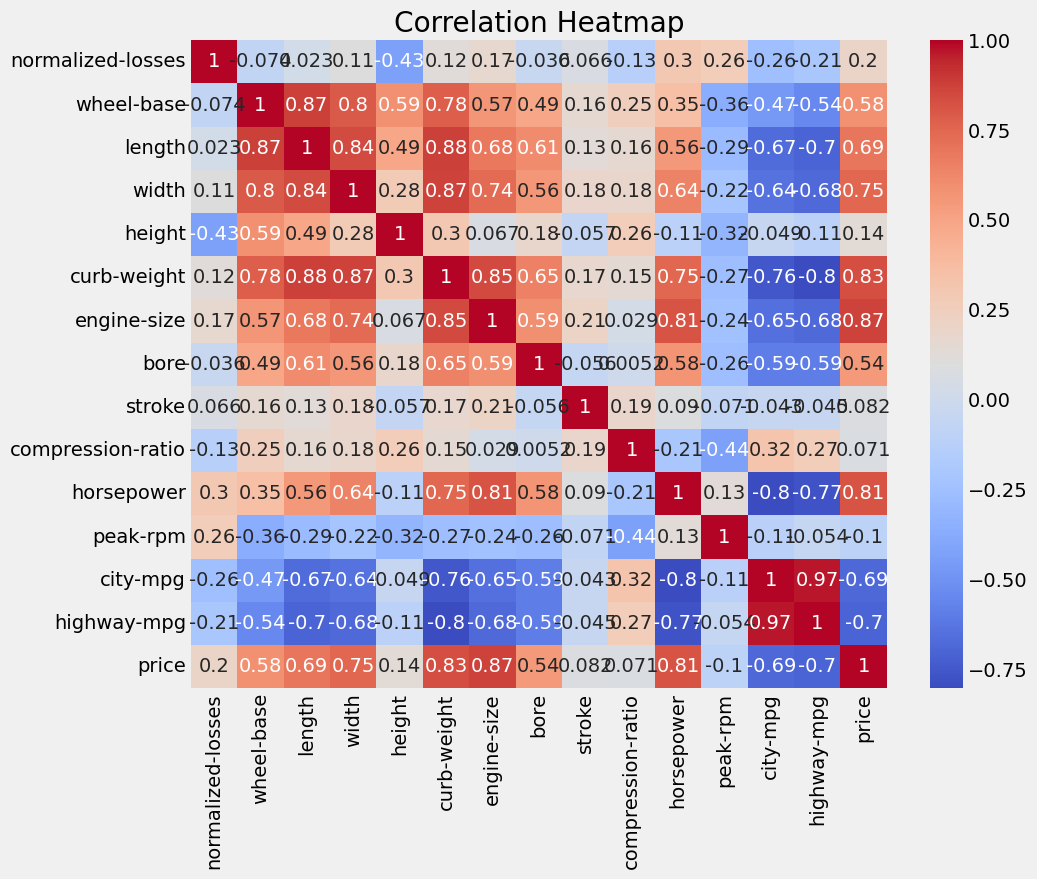

In [34]:
# Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 3. Extraction of Insights
This section focuses on extracting actionable insights to inform risk prediction and characterize segments. Steps include:

- Summary Statistics: Provide a summary of key features that influence risk rating, such as engine type, price, or drive wheels, to better understand typical car profiles and segments.
- Feature Importance for Risk Prediction: Identify which features are most significant in predicting the car's insurance risk rating using correlation and statistical tests.
- Segmentation of Population: Cluster the dataset into segments (e.g., based on car type, price range, or risk level) to characterize different population segments, helping insurers understand their customer base.

Insights
- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- HigerEnd cars seems to have rwd drivewheel

### 4. Understanding and Cleaning of Data

In this section, we focus on understanding the structure and content of the dataset, identifying any inconsistencies or missing values, and applying appropriate cleaning techniques to prepare the data for analysis. This involves:

- Data Exploration: Investigate the dataset's structure, including the number of rows and columns, data types, and unique values in each column.
- Data Cleaning: Address any data quality issues, such as missing values, duplicates, or incorrect data types, to ensure the dataset is clean and consistent.
- Feature Engineering: Create new features or transform existing ones to better represent the underlying data and improve predictive performance.
- Data Transformation: Normalize or scale the data as needed to ensure all features are on a similar scale for modeling.


#### 4.1 Identifying categorical and numerical columns

In [35]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)
print(f"There are {len(numerical)} numerical columns:")
print(numerical)
print(f"There are {len(categorical)} categorical columns:")
print(categorical)

There are 16 numerical columns:
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
There are 10 categorical columns:
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [36]:
def check(dataframe):
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,float64,51,41
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,2,2
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


#### 4.2 Data Cleaning due to special characters removed in previous steps

In [37]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<Axes: >

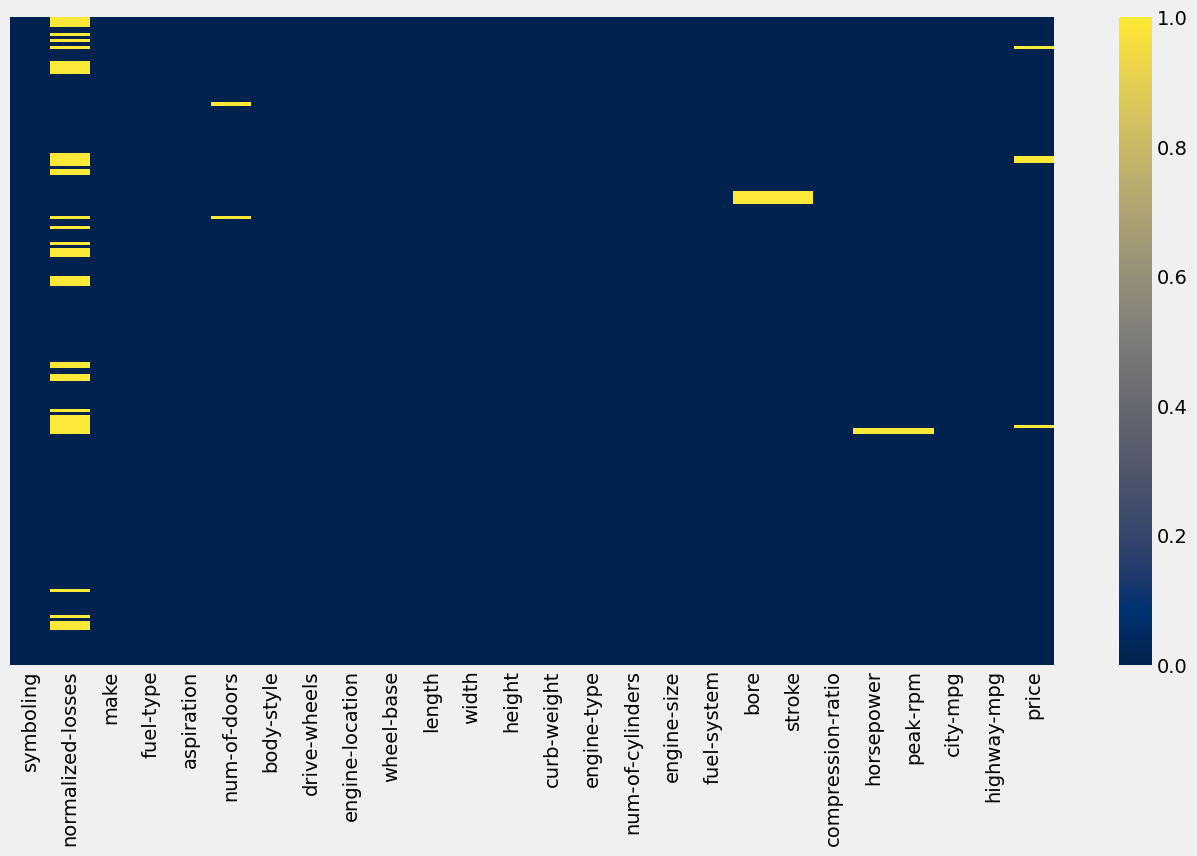

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='cividis')

/var/folders/ml/jw4fkwpd5pl0zq651sqzfz3c0000gn/T/ipykernel_48553/990051494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='normalized_losses_na', data=null_count_by_make, palette='viridis')


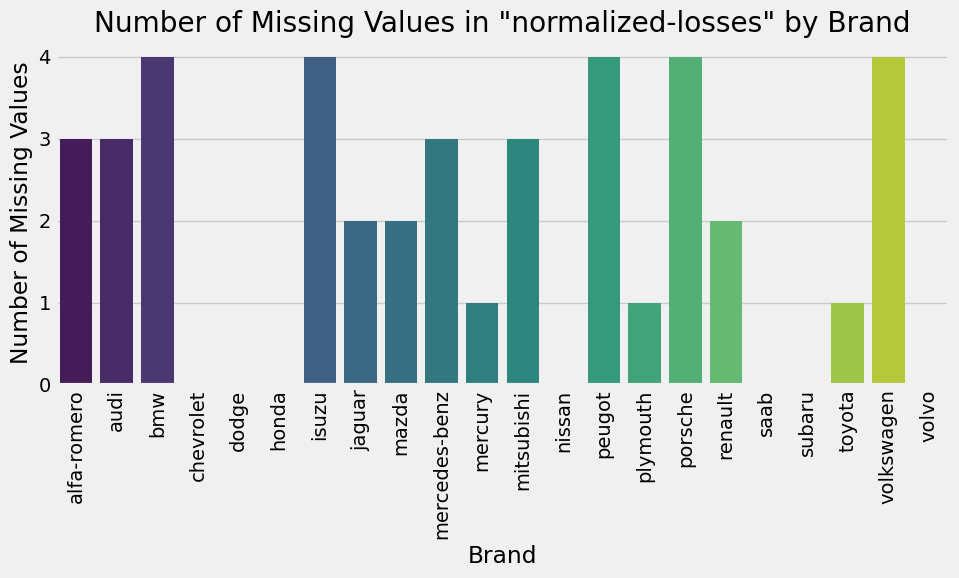

In [39]:
df['normalized_losses_na'] = df['normalized-losses'].isna().astype(int)

# Count how many missing values each brand has in 'make'
null_count_by_make = df.groupby('make')['normalized_losses_na'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='normalized_losses_na', data=null_count_by_make, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Missing Values in "normalized-losses" by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Missing Values')

# Display the plot
plt.tight_layout()
plt.show()

#### 4.3 Detecting and Handling Outliers

In [40]:
def detect_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # If there are outliers, print how many and which ones
    if not outliers.empty:
        print(f"\nOutliers in the column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(outliers[['symboling', column]])  # Only show the column with outliers and the identifier
    else:
        print(f"No outliers found in the column '{column}'")

# List of numeric columns
numerical_columns = ['symboling', 'wheel-base', 'length', 'width', 'height',
                     'curb-weight', 'engine-size', 'compression-ratio',
                     'city-mpg', 'highway-mpg']

# Iterate over the numeric columns to detect outliers
for column in numerical_columns:
    detect_outliers(df, column)

No outliers found in the column 'symboling'

Outliers in the column 'wheel-base':
Number of outliers: 3
    symboling  wheel-base
70         -1       115.6
71         -1       115.6
73          0       120.9

Outliers in the column 'length':
Number of outliers: 1
    symboling  length
18          2   141.1

Outliers in the column 'width':
Number of outliers: 8
     symboling  width
6            1   71.4
7            1   71.4
8            1   71.4
70          -1   71.7
71          -1   71.7
73           0   71.7
74           1   72.0
129          1   72.3
No outliers found in the column 'height'
No outliers found in the column 'curb-weight'

Outliers in the column 'engine-size':
Number of outliers: 10
    symboling  engine-size
15          0        209.0
16          0        209.0
17          0        209.0
47          0        258.0
48          0        258.0
49          0        326.0
71         -1        234.0
72          3        234.0
73          0        308.0
74          1       

#### 4.4 Removing Outliers

In [46]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Create a copy of the original DataFrame
df_cleaned = df.copy()

# Iterate over the numeric columns to remove the outliers
for column in numerical_columns:
    df_cleaned = remove_outliers(df_cleaned, column)

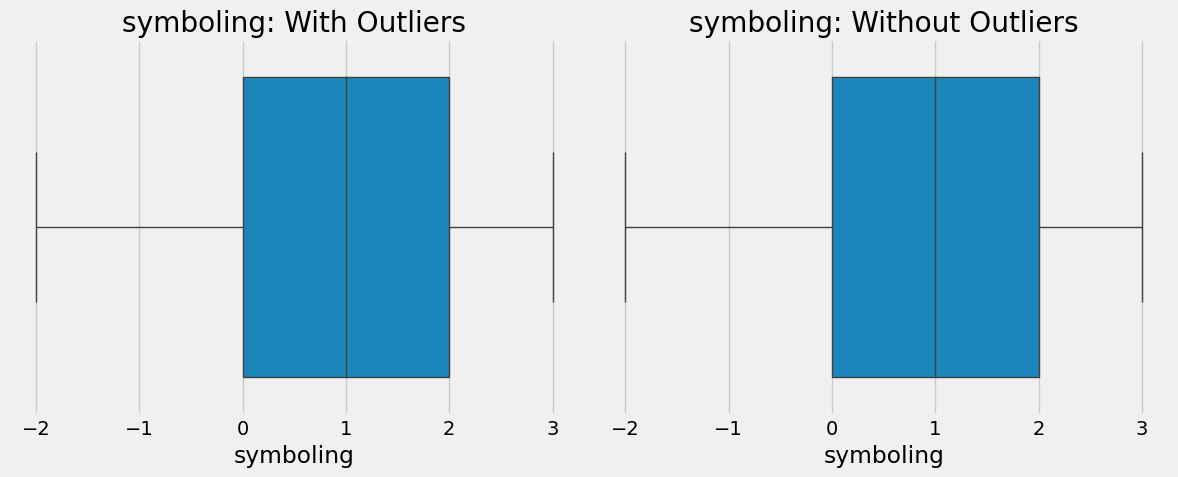

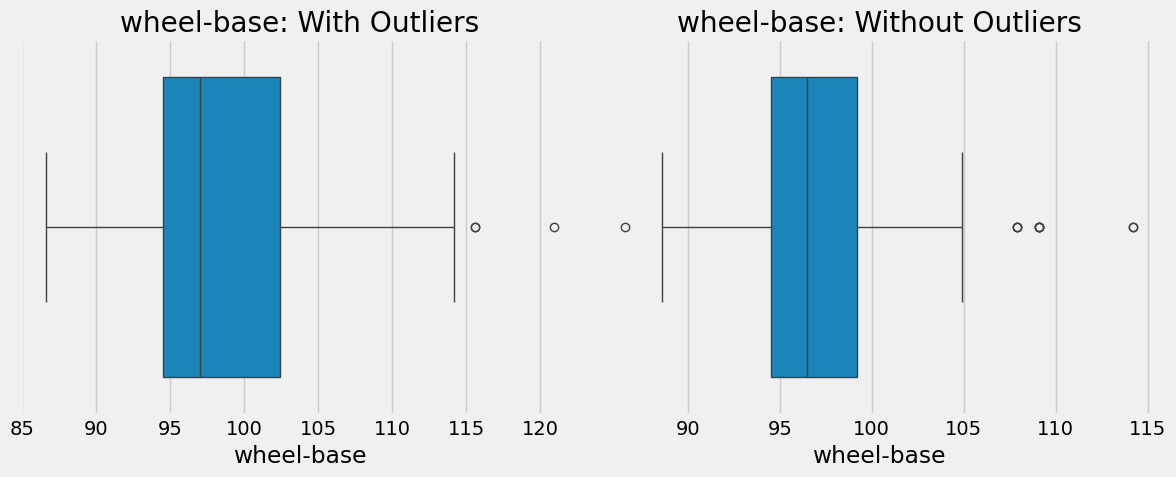

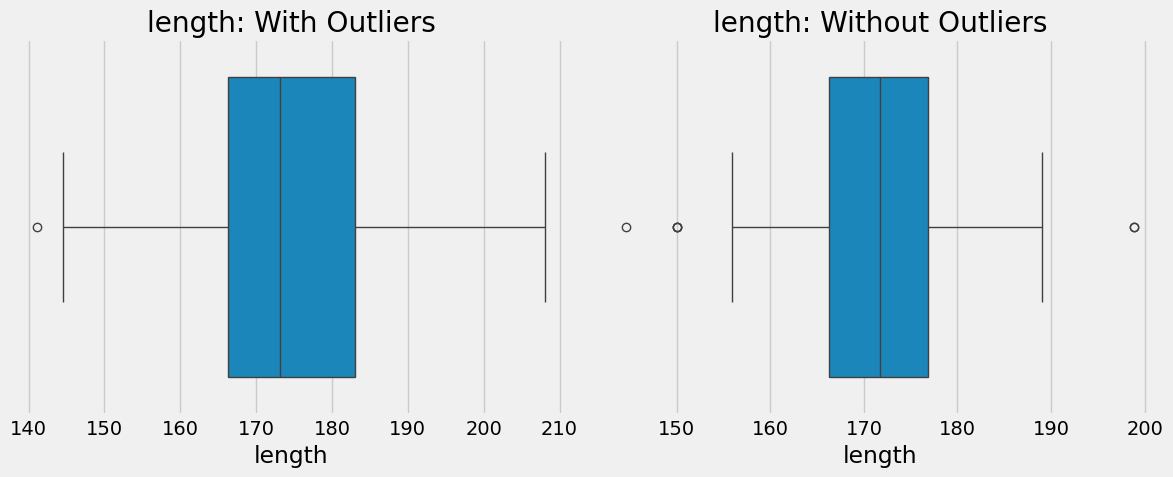

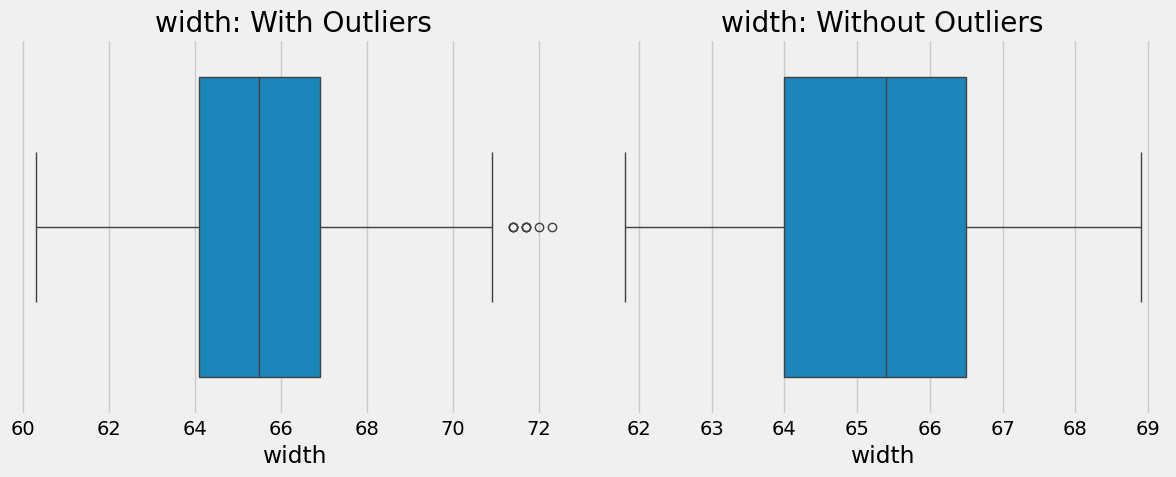

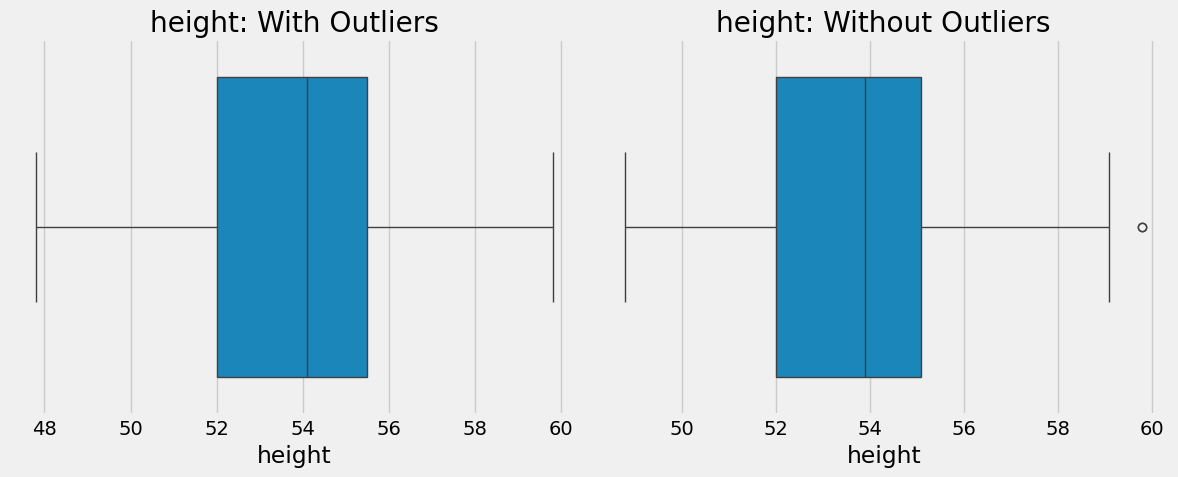

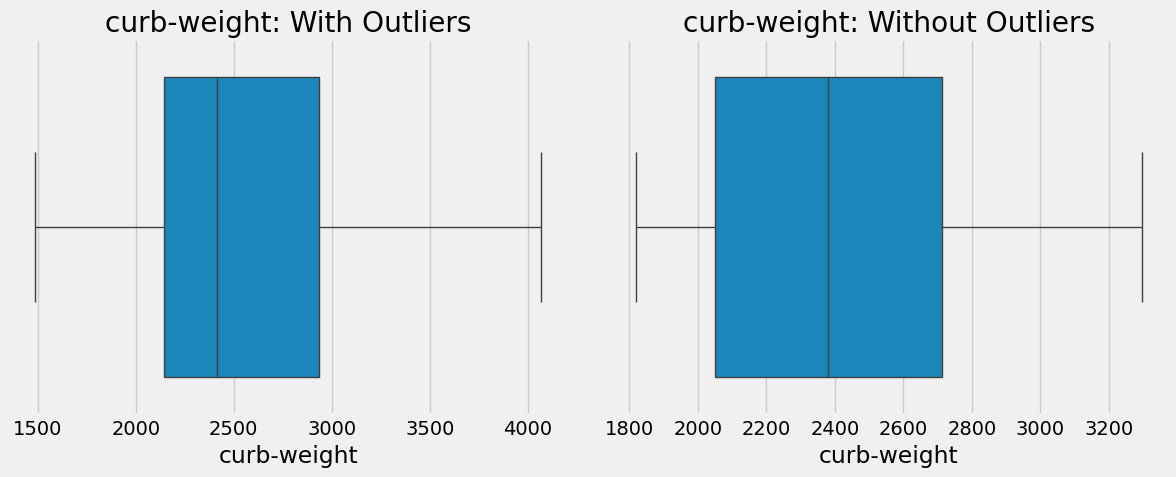

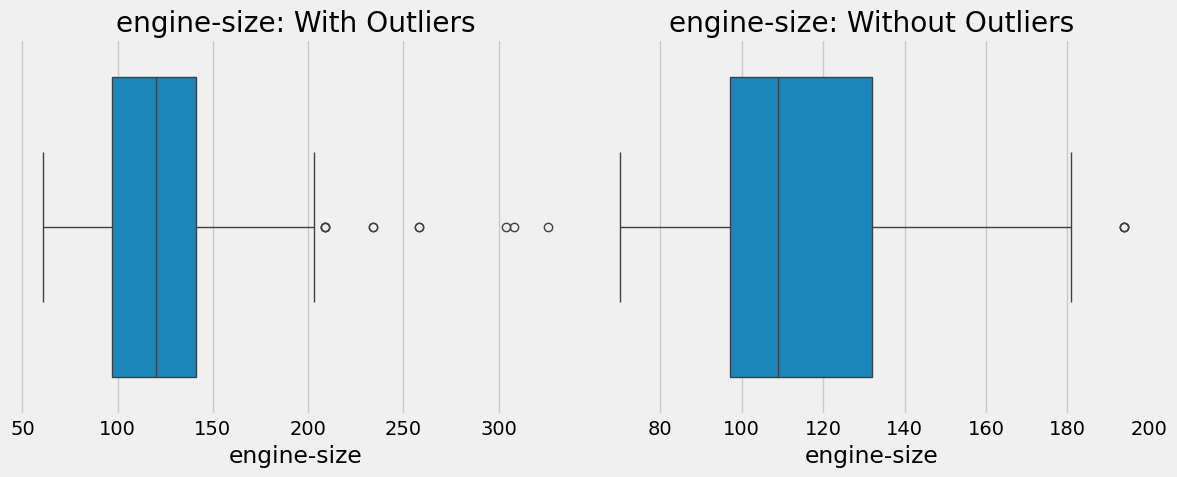

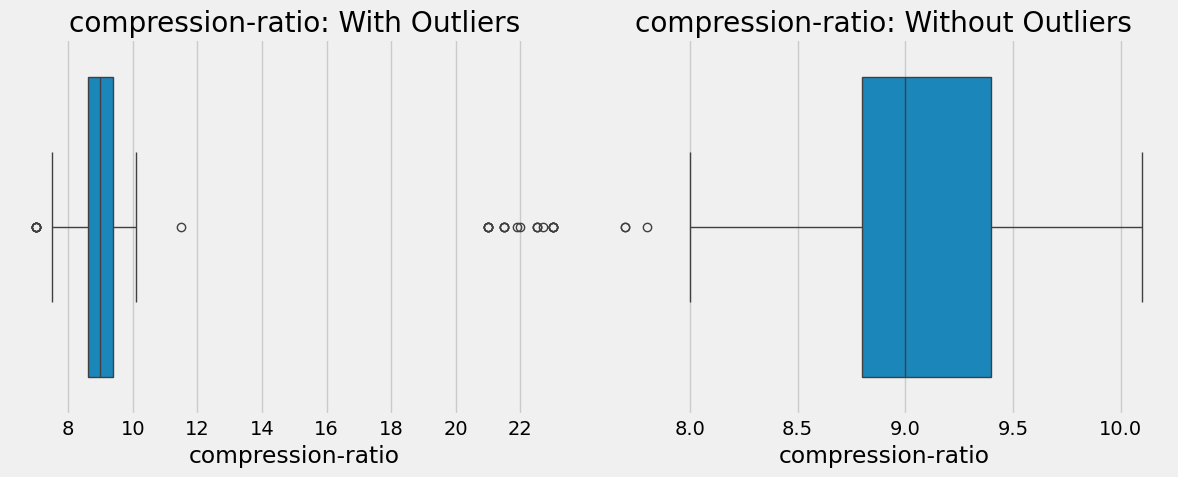

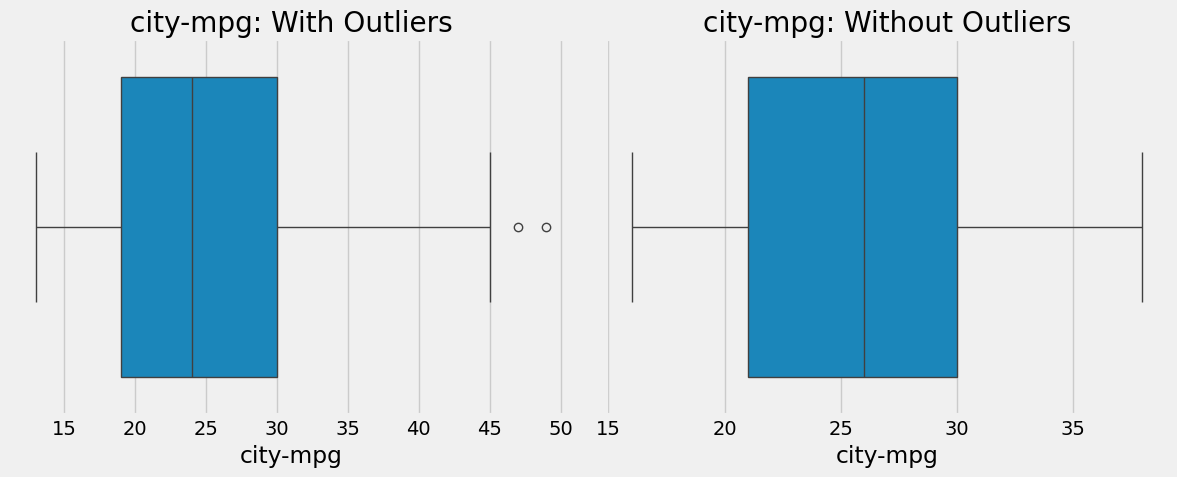

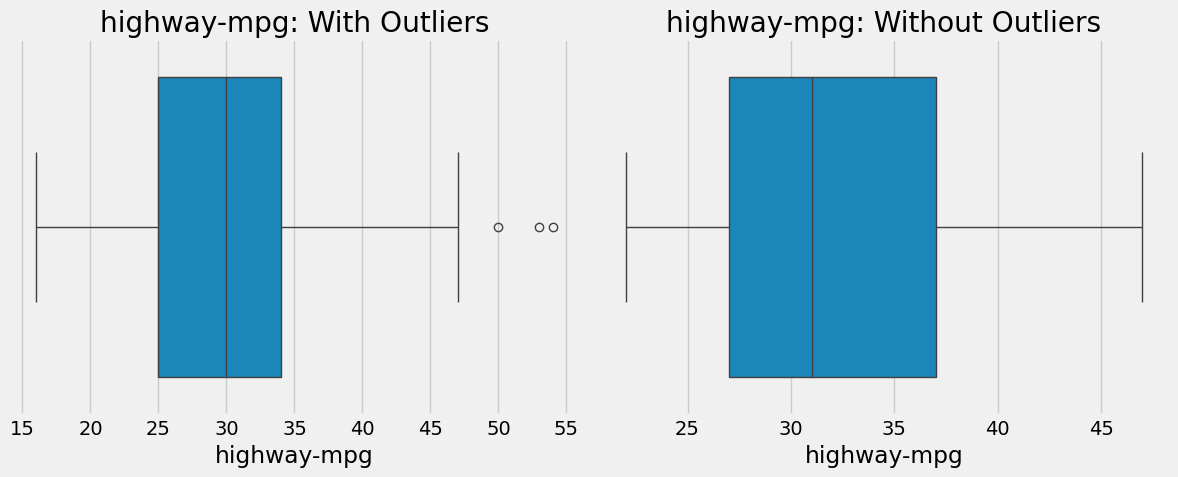

In [47]:
def plot_before_after_outliers(df_original,df_cleaned, column):
    plt.figure(figsize=(12, 5))

    # Plot with outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_original[column])
    plt.title(f'{column}: With Outliers')

    # Plot without outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'{column}: Without Outliers')

    plt.tight_layout()
    plt.show()

# Plot comparisons for each numeric column
for column in numerical_columns:
    plot_before_after_outliers(df,df_cleaned, column)